## Import Statements

In [1]:
# General
import pandas as pd
import numpy as np
from pandas.tseries.offsets import DateOffset

# Paths and Files
from pathlib import Path
import os

# Data Processing
from sklearn.preprocessing import StandardScaler

# Model development and evaluation
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# Plotting
import matplotlib.pyplot as plt
# import matplotlib.ticker as mtick # Used to reformat a plot axis as a percentage
import hvplot.pandas
import seaborn as sns

# Quality of life improvements
import warnings
warnings.filterwarnings('ignore') # Filter out warnings to improve readability

---

## Loading the Data

In [2]:
# 10-year Treasury Bonds

# Initialize an empty dataframe
ten_year_treasury_bond_df = pd.DataFrame(columns=["Date","Price","Open","High","Low","Change %"])

# Set the folder path
folder_path = Path("./Resources/10_year_treasury_bond")

# Create an array of each file in the folder located at the path
array_of_filenames = [filename for filename in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, filename))]

# For each file in the folder, append its contents to the initialized dataframe
for filename in array_of_filenames:
    ten_year_treasury_bond_df = pd.concat(
        [
            ten_year_treasury_bond_df,
            pd.read_csv(
                Path(str(folder_path) + "/" + filename)
            )
        ]
        , ignore_index=True
    )

# Set the index to be the date
ten_year_treasury_bond_df.set_index('Date', inplace=True)

# Format the index as a datetime
ten_year_treasury_bond_df.index = pd.to_datetime(ten_year_treasury_bond_df.index, format='%m/%d/%Y')

# Sort the values by Date ascending
ten_year_treasury_bond_df.sort_values(by=['Date'], inplace=True)

ten_year_treasury_bond_df.head()

,Price,Open,High,Low,Change %
Date,,,,,
1980-01-02,10.482,10.482,10.482,10.482,1.67%
1980-01-03,10.584,10.584,10.584,10.584,0.97%
1980-01-04,10.636,10.636,10.636,10.636,0.49%
1980-01-07,10.610,10.610,10.610,10.610,-0.24%
1980-01-08,10.553,10.553,10.553,10.553,-0.54%


In [3]:
# 2-year Treasury Bonds

# Initialize an empty dataframe
two_year_treasury_bond_df = pd.DataFrame(columns=["Date","Price","Open","High","Low","Change %"])

# Set the folder path
folder_path = Path("./Resources/2_year_treasury_bond")

# Create an array of each file in the folder located at the path
array_of_filenames = [filename for filename in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, filename))]

# For each file in the folder, append its contents to the initialized dataframe
for filename in array_of_filenames:
    two_year_treasury_bond_df = pd.concat(
        [
            two_year_treasury_bond_df,
            pd.read_csv(
                Path(str(folder_path) + "/" + filename)
            )
        ]
        , ignore_index=True
    )

# Set the index to be the date
two_year_treasury_bond_df.set_index('Date', inplace=True)

# Format the index as a datetime
two_year_treasury_bond_df.index = pd.to_datetime(two_year_treasury_bond_df.index, format='%m/%d/%Y')

# Sort the values by Date ascending
two_year_treasury_bond_df.sort_values(by=['Date'], inplace=True)

two_year_treasury_bond_df.head()

,Price,Open,High,Low,Change %
Date,,,,,
1988-02-26,7.159,7.159,7.159,7.159,-0.47%
1988-02-29,7.125,7.125,7.125,7.125,-0.47%
1988-03-01,7.108,7.108,7.108,7.108,-0.24%
1988-03-02,7.090,7.090,7.090,7.090,-0.25%
1988-03-03,7.090,7.090,7.090,7.090,0.00%


In [4]:
# 3-month Treasury Bonds

# Initialize an empty dataframe
three_month_treasury_bond_df = pd.DataFrame(columns=["DATE","DTB3"])

# Set the folder path
folder_path = Path("./Resources/3_month_treasury_bond")

# Create an array of each file in the folder located at the path
array_of_filenames = [filename for filename in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, filename))]

# For each file in the folder, append its contents to the initialized dataframe
for filename in array_of_filenames:
    three_month_treasury_bond_df = pd.concat(
        [
            three_month_treasury_bond_df,
            pd.read_csv(
                Path(str(folder_path) + "/" + filename)
            )
        ]
        , ignore_index=True
    )

# Set the index to be the date
three_month_treasury_bond_df.set_index('DATE', inplace=True)

# Format the index as a datetime
three_month_treasury_bond_df.index = pd.to_datetime(three_month_treasury_bond_df.index, format='%Y-%m-%d')

# Sort the values by Date ascending
three_month_treasury_bond_df.sort_values(by=['DATE'], inplace=True)

three_month_treasury_bond_df.head()

,DTB3
DATE,
1954-01-04,1.330
1954-01-05,1.280
1954-01-06,1.280
1954-01-07,1.310
1954-01-08,1.310


In [5]:
# S&P Prices (OLD)

# Initialize an empty dataframe
sp500_old_df = pd.DataFrame(columns=["Date","Price","Open","High","Low","Vol.","Change %"])

# Set the folder path
folder_path = Path("./Resources/sp500_old")

# Create an array of each file in the folder located at the path
array_of_filenames = [filename for filename in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, filename))]

# For each file in the folder, append its contents to the initialized dataframe
for filename in array_of_filenames:
    sp500_old_df = pd.concat(
        [
            sp500_old_df,
            pd.read_csv(
                Path(str(folder_path) + "/" + filename)
            )
        ]
        , ignore_index=True
    )

# Set the index to be the date
sp500_old_df.set_index('Date', inplace=True)

# Format the index as a datetime
sp500_old_df.index = pd.to_datetime(sp500_old_df.index, format='%m/%d/%Y')

# Sort the values by Date ascending
sp500_old_df.sort_values(by=['Date'], inplace=True)

sp500_old_df.head()

,Price,Open,High,Low,Vol.,Change %
Date,,,,,,
1979-12-26,107.8,107.8,108.4,107.1,NaN,0.09%
1979-12-27,108.0,108.0,108.5,107.1,NaN,0.19%
1979-12-28,107.8,107.8,108.6,107.2,NaN,-0.19%
1979-12-31,107.9,107.9,108.5,107.3,NaN,0.09%
1980-01-01,107.9,107.9,107.9,107.9,NaN,0.00%


In [6]:
# S&P Prices

# Initialize an empty dataframe
sp500_df = pd.DataFrame(columns=["Date","Open","High","Low","Close","Adj Close","Volume"])

# Set the folder path
folder_path = Path("./Resources/sp500")

# Create an array of each file in the folder located at the path
array_of_filenames = [filename for filename in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, filename))]

# For each file in the folder, append its contents to the initialized dataframe
for filename in array_of_filenames:
    sp500_df = pd.concat(
        [
            sp500_df,
            pd.read_csv(
                Path(str(folder_path) + "/" + filename)
            )
        ]
        , ignore_index=True
    )

# Set the index to be the date
sp500_df.set_index('Date', inplace=True)

# Format the index as a datetime
sp500_df.index = pd.to_datetime(sp500_df.index, format='%Y-%m-%d')

# Sort the values by Date ascending
sp500_df.sort_values(by=['Date'], inplace=True)

sp500_df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1962-01-02,0.0,71.959999,70.709999,70.959999,70.959999,3120000
1962-01-03,0.0,71.480003,70.379997,71.129997,71.129997,3590000
1962-01-04,0.0,71.620003,70.449997,70.639999,70.639999,4450000
1962-01-05,0.0,70.839996,69.349998,69.660004,69.660004,4630000
1962-01-08,0.0,69.839996,68.169998,69.120003,69.120003,4620000


In [7]:
# T-Bill Summary

# Initialize an empty dataframe
tbill_summary_df = pd.DataFrame(columns=["date","US1M","US3M","US6M","US1Y","US2Y","US3Y","US5Y","US7Y","US10Y","US20Y","US30Y"])

# Set the folder path
folder_path = Path("./Resources/summary_spreadsheet")

# Create an array of each file in the folder located at the path
array_of_filenames = [filename for filename in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, filename))]

# For each file in the folder, append its contents to the initialized dataframe
for filename in array_of_filenames:
    tbill_summary_df = pd.concat(
        [
            tbill_summary_df,
            pd.read_csv(
                Path(str(folder_path) + "/" + filename)
            )
        ]
        , ignore_index=True
    )

# Set the index to be the date
tbill_summary_df.set_index('date', inplace=True)

# Format the index as a datetime
tbill_summary_df.index = pd.to_datetime(tbill_summary_df.index, format='%Y-%m-%d')

# Sort the values by Date ascending
tbill_summary_df.sort_values(by=['date'], inplace=True)

tbill_summary_df.head()

,US1M,US3M,US6M,US1Y,US2Y,US3Y,US5Y,US7Y,US10Y,US20Y,US30Y
date,,,,,,,,,,,
1962-01-02,NaN,NaN,NaN,3.22,NaN,3.70,3.88,NaN,4.06,4.07,NaN
1962-01-03,NaN,NaN,NaN,3.24,NaN,3.70,3.87,NaN,4.03,4.07,NaN
1962-01-04,NaN,NaN,NaN,3.24,NaN,3.69,3.86,NaN,3.99,4.06,NaN
1962-01-05,NaN,NaN,NaN,3.26,NaN,3.71,3.89,NaN,4.02,4.07,NaN
1962-01-08,NaN,NaN,NaN,3.31,NaN,3.71,3.91,NaN,4.03,4.08,NaN


In [8]:
# Review the tbill_summary_df
# tbill_summary_df.loc[tbill_summary_df['US30Y'].isna() != True].head()

<Axes: xlabel='date'>

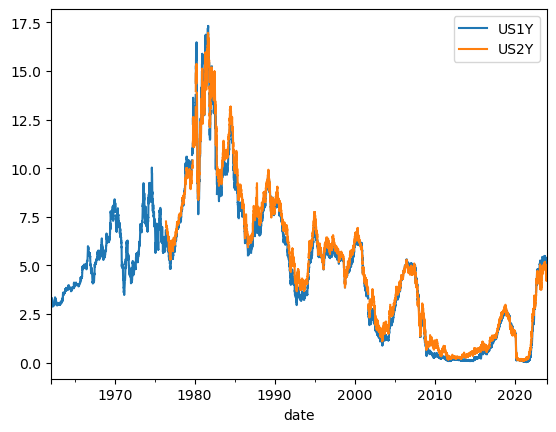

In [9]:
tbill_summary_df[['US1Y','US2Y']].plot()

In [80]:
sp500_observations_df = sp500_df[['Close','Adj Close']].copy()
sp500_observations_df['Signal_1'] = 0.0
sp500_observations_df.loc["1962-01-02":"1968-11-28", 'Signal_1'] = 1.0
sp500_observations_df.loc["1970-05-26":"1973-01-10", 'Signal_1'] = 1.0
sp500_observations_df.loc["1974-10-03":"1976-12-30", 'Signal_1'] = 1.0
sp500_observations_df.loc["1982-08-12":"1987-08-24", 'Signal_1'] = 1.0
sp500_observations_df.loc["1987-12-04":"1990-07-15", 'Signal_1'] = 1.0
sp500_observations_df.loc["1990-10-11":"2000-03-22", 'Signal_1'] = 1.0
sp500_observations_df.loc["2002-10-09":"2007-10-08", 'Signal_1'] = 1.0
sp500_observations_df.loc["2009-03-09":"2010-04-22", 'Signal_1'] = 1.0
sp500_observations_df.loc["2010-07-02":"2011-04-28", 'Signal_1'] = 1.0
sp500_observations_df.loc["2011-10-03":"2018-09-19", 'Signal_1'] = 1.0
sp500_observations_df.loc["2018-12-24":"2020-02-18", 'Signal_1'] = 1.0
sp500_observations_df.loc["2020-03-23":"2022-01-03", 'Signal_1'] = 1.0
sp500_observations_df.loc["2022-10-12":"2024-01-08", 'Signal_1'] = 1.0

sp500_observations_df = sp500_observations_df.dropna()

sp500_observations_df[['Adj Close','Signal_1']].head()

,Adj Close,Signal_1
Date,,
1962-01-02,70.959999,1.0
1962-01-03,71.129997,1.0
1962-01-04,70.639999,1.0
1962-01-05,69.660004,1.0
1962-01-08,69.120003,1.0


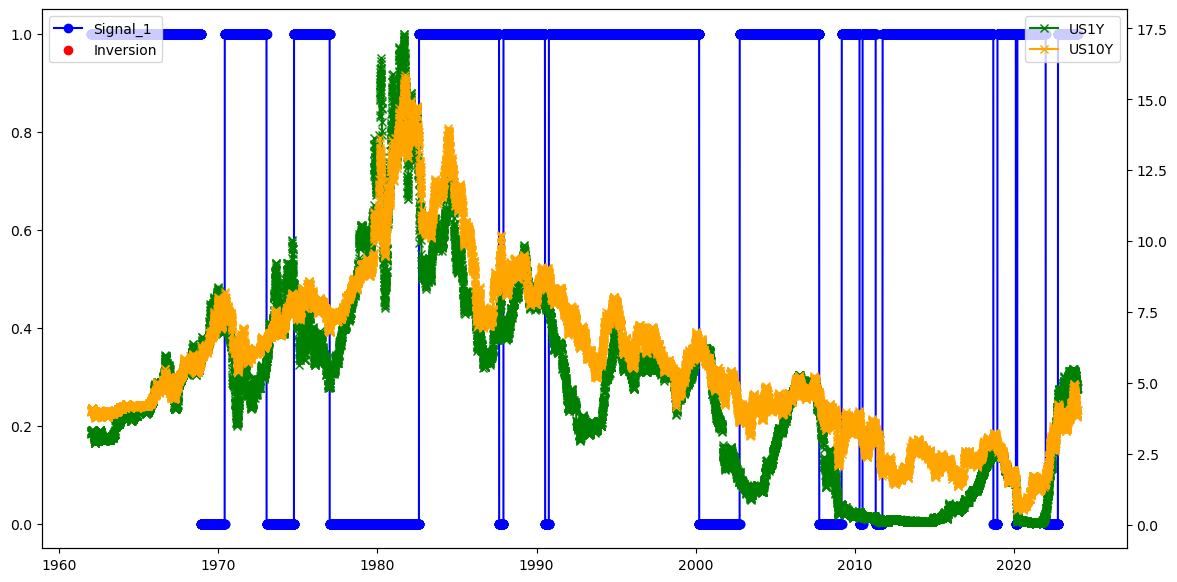

In [119]:
# Plot Signal_1 column from sp500_observations_df

# Merge DataFrames on their date indices
merged_df = sp500_observations_df[['Signal_1']].merge(tbill_summary_df[['US1Y', 'US10Y']], how='outer', left_index=True, right_index=True)

# Plot the merged DataFrame
fig, ax1 = plt.subplots(figsize=(14, 7))

# Plot 'Signal_1' on the left y-axis
ax1.plot(merged_df['Signal_1'], label='Signal_1', marker='o', linestyle='-', color='blue')

# Create a mask for inversion points
inversion_mask = merged_df['US1Y'] > merged_df['US10Y']

# Highlight the inverted points with red color
ax1.scatter(merged_df.index[inversion_mask], merged_df['Signal_1'][inversion_mask], color='red', label='Inversion')

# Plot 'US1Y' and 'US2Y' on the right y-axis
ax2 = ax1.twinx()
ax2.plot(merged_df['US1Y'], label='US1Y', linestyle='-', linewidth=1.5, marker='x', color='green')
ax2.plot(merged_df['US10Y'], label='US10Y', linestyle='-', linewidth=1.5, marker='x', color='orange')

# Show the legend
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Show the plot
plt.show()

<Axes: xlabel='Date'>

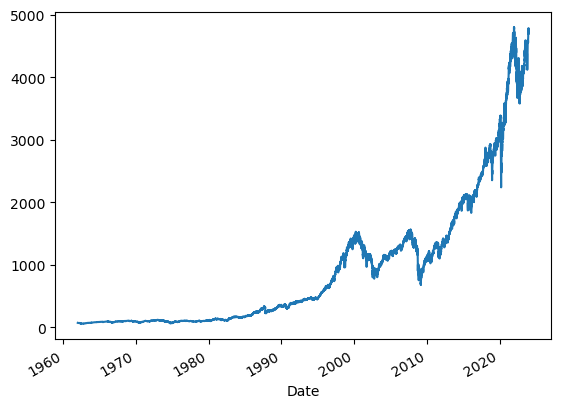

In [85]:
#sp500_df['Adj Close' ["1999-01-01":"2001-01-01"]].plot()
sp500_df['Adj Close'].plot()

In [90]:
results_df = pd.DataFrame(sp500_observations_df['Adj Close'].pct_change())

results_df['ideal_returns'] = sp500_observations_df['Adj Close'].pct_change() * sp500_observations_df['Signal_1'].shift()

results_df.head(50)

,Adj Close,ideal_returns
Date,,
1962-01-02,NaN,NaN
1962-01-03,0.002396,0.002396
1962-01-04,-0.006889,-0.006889
1962-01-05,-0.013873,-0.013873
1962-01-08,-0.007752,-0.007752
1962-01-09,0.000434,0.000434
1962-01-10,-0.002748,-0.002748
1962-01-11,0.005946,0.005946
1962-01-12,0.003460,0.003460


<Axes: xlabel='Date'>

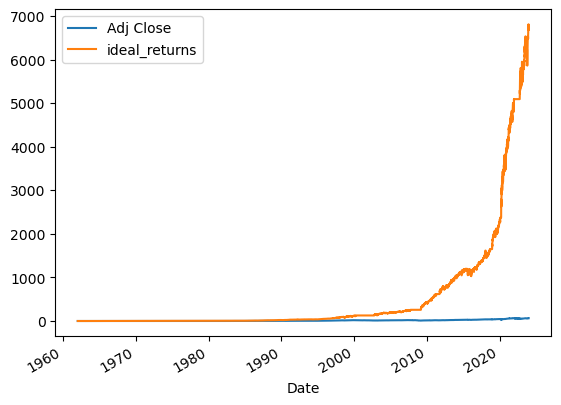

In [91]:
(1+results_df).cumprod().plot()

In [122]:
combined_df = pd.concat([sp500_observations_df, tbill_summary_df, three_month_treasury_bond_df], axis=1)
combined_df.head()

,Close,Adj Close,Signal_1,US1M,US3M,US6M,US1Y,US2Y,US3Y,US5Y,US7Y,US10Y,US20Y,US30Y,DTB3
1954-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.330
1954-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.280
1954-01-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.280
1954-01-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.310
1954-01-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.310


In [128]:
combined_df = combined_df.drop(['Close', 'US1M', 'US3M', 'US6M', 'US2Y', 'US3Y', 'US5Y', 'US7Y', 'US20Y', 'US30Y'], axis=1)

In [130]:
combined_df = combined_df.dropna()


In [131]:
combined_df

,Adj Close,Signal_1,US1Y,US10Y,DTB3
1962-01-02,70.959999,1.0,3.22,4.06,2.700
1962-01-03,71.129997,1.0,3.24,4.03,2.730
1962-01-04,70.639999,1.0,3.24,3.99,2.720
1962-01-05,69.660004,1.0,3.26,4.02,2.740
1962-01-08,69.120003,1.0,3.31,4.03,2.780
...,...,...,...,...,...
2023-12-29,4769.830078,1.0,4.79,3.88,5.20
2024-01-02,4742.830078,1.0,4.80,3.95,5.22
2024-01-03,4704.810059,1.0,4.81,3.91,5.24
2024-01-04,4688.680176,1.0,4.85,3.99,5.24


In [165]:
# Assuming you have a dataframe with a column 'Close' representing the closing prices
# and a column 'Signal' that you want to generate

def generate_signals(combined_df, threshold_percentage=20):
    combined_df['Signal'] = 1.0  # Initialize all signals to 1.0

    for i in range(1, len(combined_df)):
        # Calculate the cumulative percentage drop from the current day to all future days
        cumulative_drop = (combined_df['Adj Close'][i] - combined_df['Adj Close'][i:]) / combined_df['Adj Close'][i]

        # Check if the cumulative drop exceeds the threshold at any point in the future
        if (cumulative_drop < -threshold_percentage / 100).any():
            # Find the highest day before the drop
            highest_before_drop = combined_df['Adj Close'][:i].idxmax()

            # Convert the datetime index to integer for slicing
            highest_before_drop_index = combined_df.index.get_loc(highest_before_drop)

            # Set signals to 0.0 from the highest day before the drop
            combined_df.iloc[highest_before_drop_index:i, combined_df.columns.get_loc('Signal')] = 0.0

            # Find the lowest day after the drop
            lowest_after_drop = combined_df['Adj Close'][i:].idxmin()

            # Convert the datetime index to integer for slicing
            lowest_after_drop_index = combined_df.index.get_loc(lowest_after_drop)

            # Set signals back to 1.0 from the lowest day after the drop
            combined_df.iloc[i:lowest_after_drop_index, combined_df.columns.get_loc('Signal')] = 1.0

    return combined_df



combined_df_with_signals = generate_signals(combined_df, threshold_percentage=20)

# Now, sp500_data_with_signals will have the 'Signal' column updated based on your conditions

In [166]:
combined_df_with_signals

,Adj Close,Signal_1,US1Y,US10Y,DTB3,Signal
1962-01-02,70.959999,1.0,3.22,4.06,2.700,0.0
1962-01-03,71.129997,1.0,3.24,4.03,2.730,0.0
1962-01-04,70.639999,1.0,3.24,3.99,2.720,0.0
1962-01-05,69.660004,1.0,3.26,4.02,2.740,0.0
1962-01-08,69.120003,1.0,3.31,4.03,2.780,0.0
...,...,...,...,...,...,...
2023-12-29,4769.830078,1.0,4.79,3.88,5.20,1.0
2024-01-02,4742.830078,1.0,4.80,3.95,5.22,1.0
2024-01-03,4704.810059,1.0,4.81,3.91,5.24,1.0
2024-01-04,4688.680176,1.0,4.85,3.99,5.24,1.0


In [167]:
com_results_df = pd.DataFrame(combined_df['Adj Close'].pct_change())

com_results_df['ideal_returns_manual'] = combined_df['Adj Close'].pct_change() * combined_df['Signal_1'].shift()

com_results_df['ideal_returns_auto'] = combined_df['Adj Close'].pct_change() * combined_df['Signal'].shift()

com_results_df.head(50)

,Adj Close,ideal_returns_manual,ideal_returns_auto
1962-01-02,NaN,NaN,NaN
1962-01-03,0.002396,0.002396,0.0
1962-01-04,-0.006889,-0.006889,-0.0
1962-01-05,-0.013873,-0.013873,-0.0
1962-01-08,-0.007752,-0.007752,-0.0
1962-01-09,0.000434,0.000434,0.0
1962-01-10,-0.002748,-0.002748,-0.0
1962-01-11,0.005946,0.005946,0.0
1962-01-12,0.003460,0.003460,0.0
1962-01-15,-0.002011,-0.002011,-0.0


<Axes: >

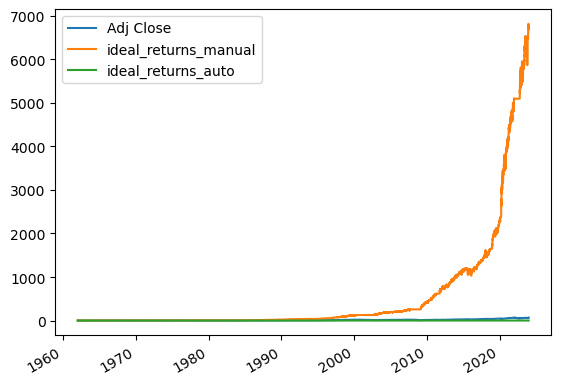

In [168]:
(1+com_results_df).cumprod().plot()

<Axes: >

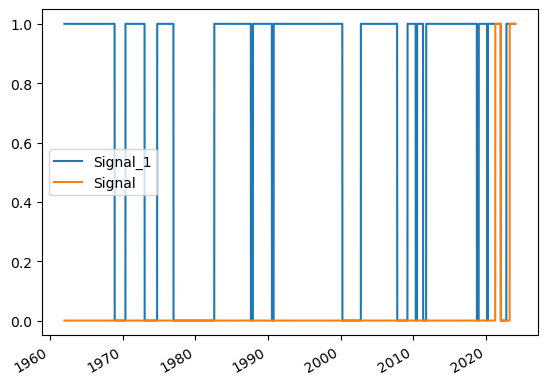

In [169]:
combined_df[['Signal_1', 'Signal']].plot()